In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### DATA EXPLORATION

In [2]:
data = pd.read_csv('Walmart.csv')
data.head(4)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106

In [3]:
data.shape

(6435, 8)

In [4]:
data.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [7]:
data.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [8]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
Store = data.groupby(['Store']).agg({'Weekly_Sales':['mean', 'max','sum']})
pd.DataFrame(Store).head(6)

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07
6      1.564728e+06  2727575.18  2.237561e+08

### DATA VISUALIZATION

In [10]:
data2 = data.drop(columns=['Date'])

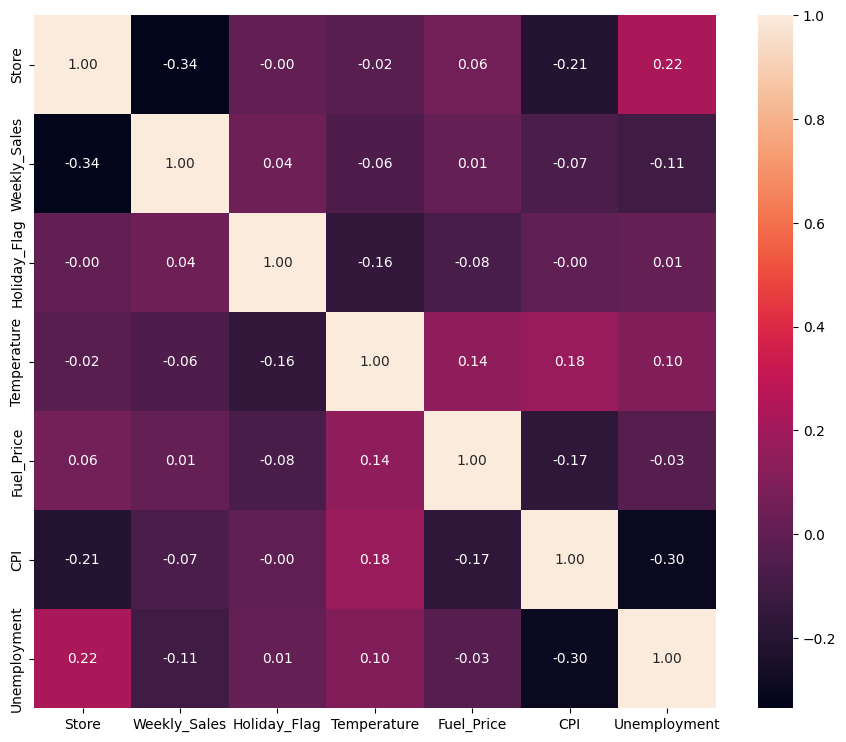

In [11]:
plt.figure(figsize=(11,9))
sns.heatmap(data2.corr(), annot=True, fmt="0.2f")

plt.show()

Text(0.5, 0, 'Temperature')

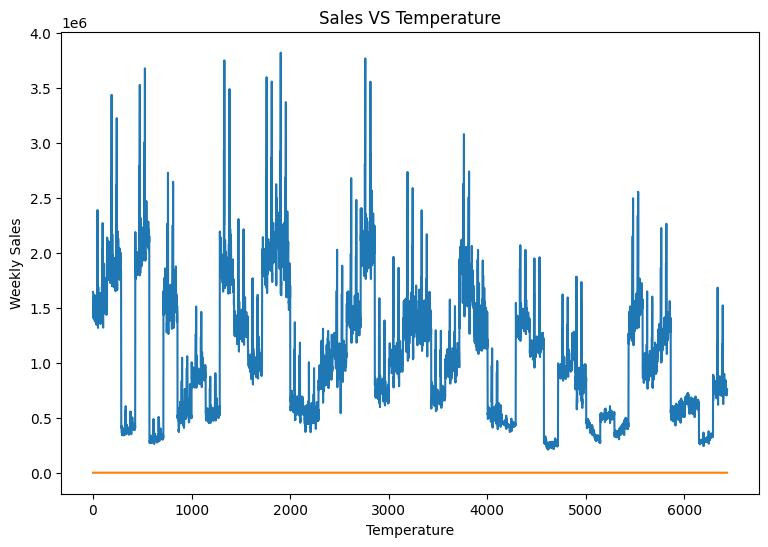

In [39]:
plt.figure(figsize=(9,6))
plt.title("Sales VS Temperature")
plt.plot(data2['Weekly_Sales'])
plt.ylabel("Weekly Sales")

plt.plot(data2['Temperature'])
plt.xlabel("Temperature")

Text(0.5, 0, 'Store')

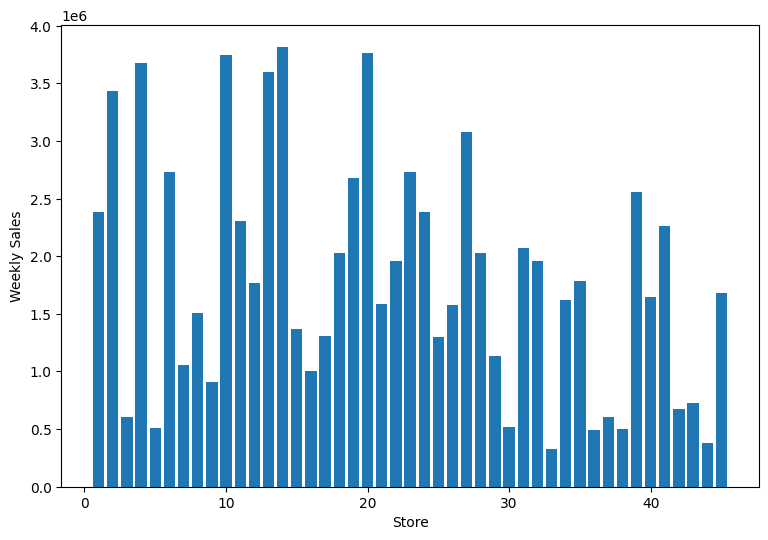

In [43]:
plt.figure(figsize=(9,6))
plt.bar(data2['Store'], data2['Weekly_Sales'])
plt.ylabel("Weekly Sales")
plt.xlabel("Store")

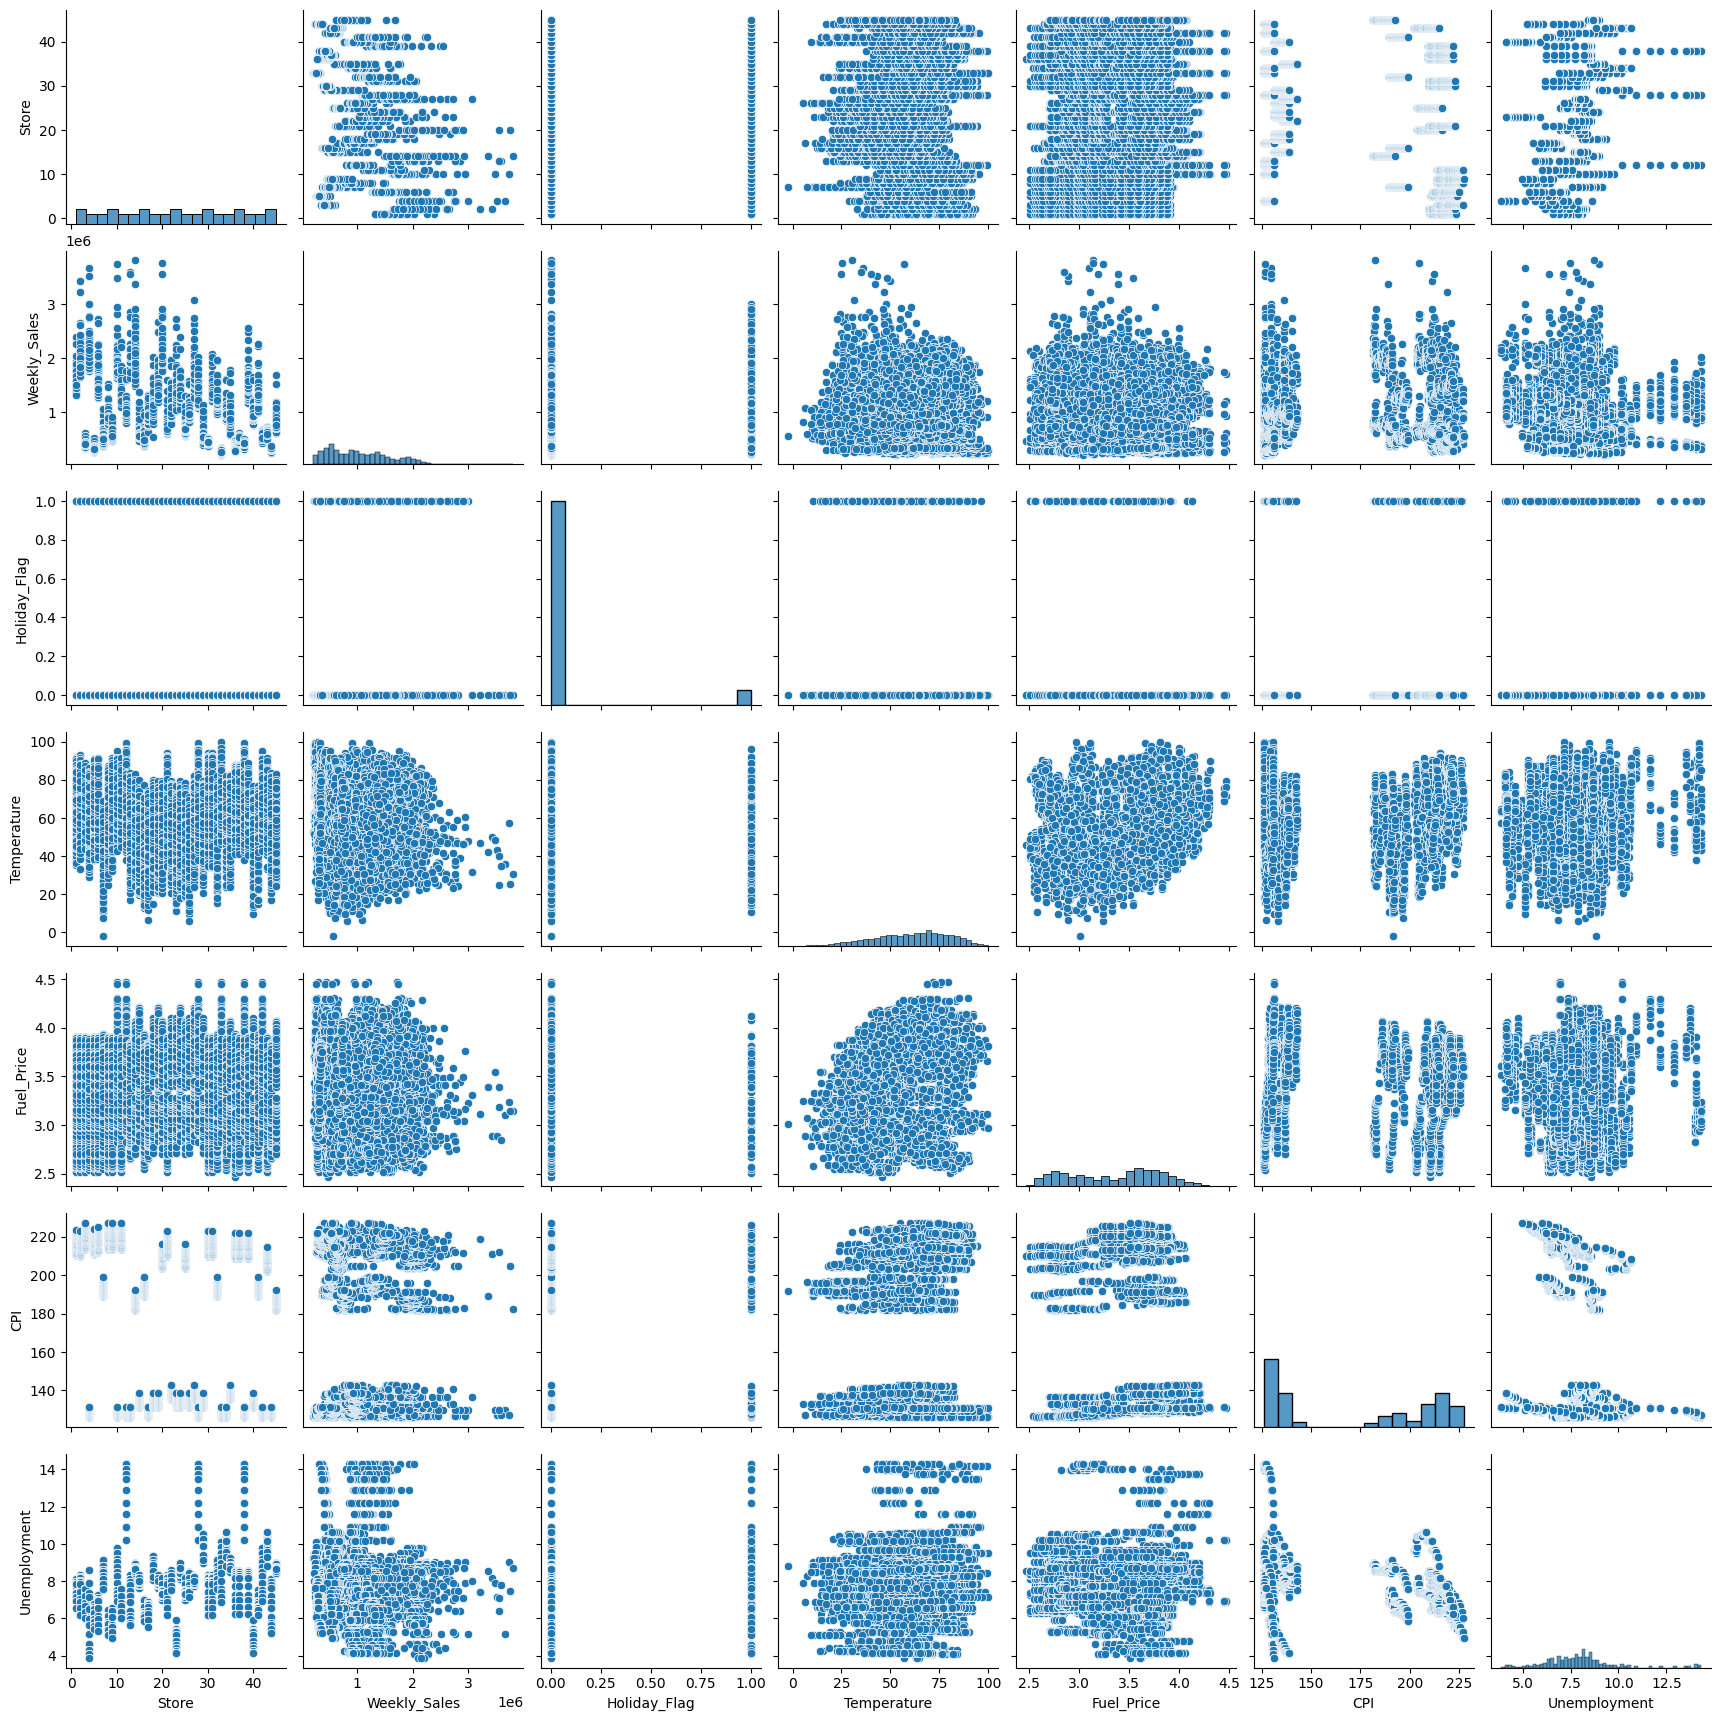

In [45]:
sns.pairplot(data2)
plt.show()

([<matplotlib.patches.Wedge at 0x20758f79b70>,
 [Text(-0.25679386593526243, -1.0696059603508306, 'Non Special Holiday Week'),
  Text(0.3268284610531304, 1.361316699760068, 'Special Holiday Week')],
 [Text(-0.14006938141923403, -0.5834214329186348, '92.50%'),
  Text(0.2101040106770124, 0.8751321641314721, '7.50%')])

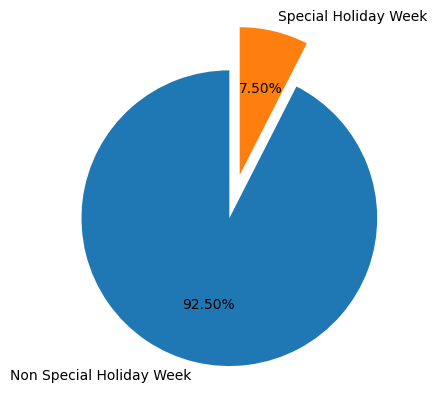

In [47]:
data3 = data2.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
plt.pie(data3['Weekly_Sales'],
        labels= ['Non Special Holiday Week','Special Holiday Week'],
        normalize=True,
        autopct='%1.2f%%',
        startangle=90,
        explode=[0,0.3])

C:\Users\jaksh\AppData\Local\Temp\ipykernel_12748\2073344160.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data2.hist(ax=ax)


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

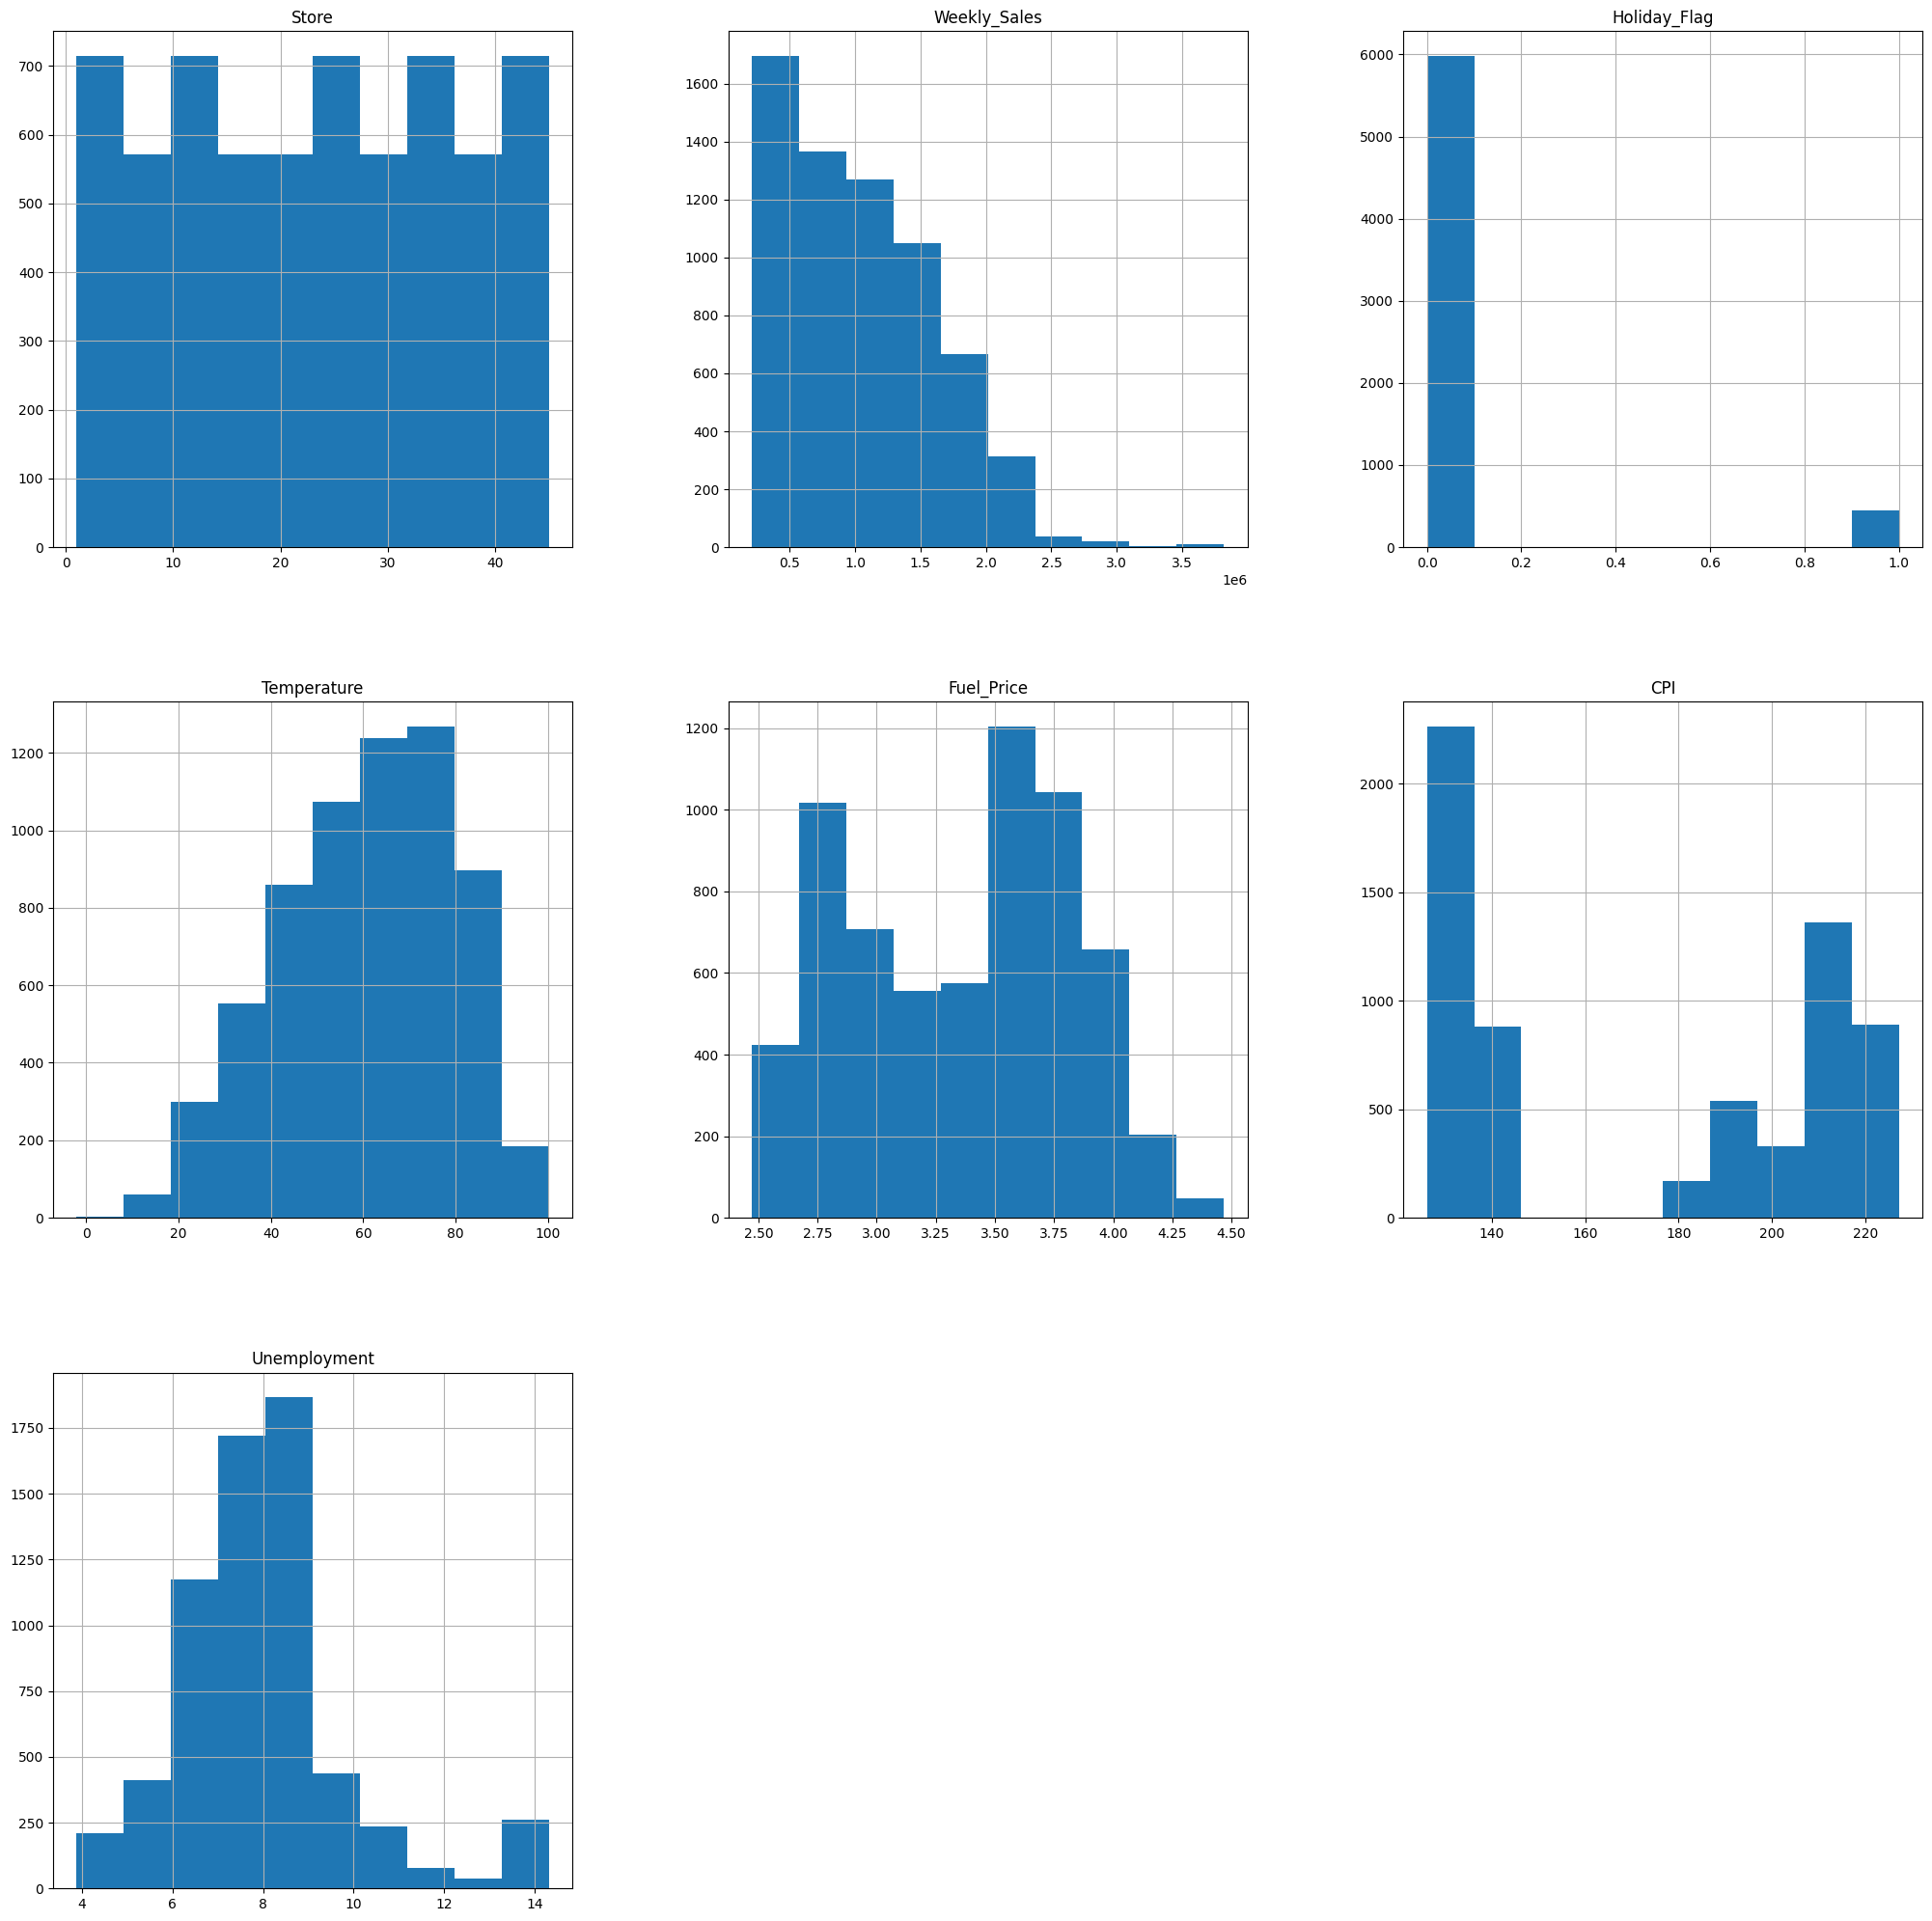

In [55]:
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
data2.hist(ax=ax)
plt.tight_layout

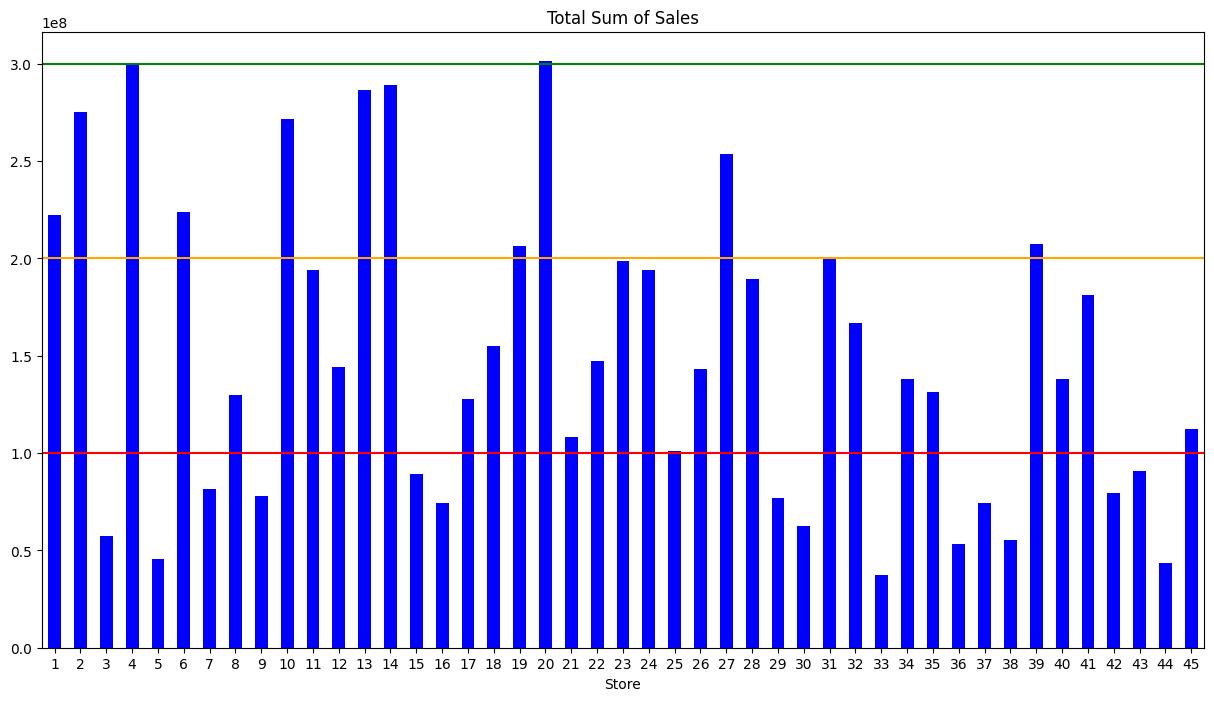

In [56]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'blue')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

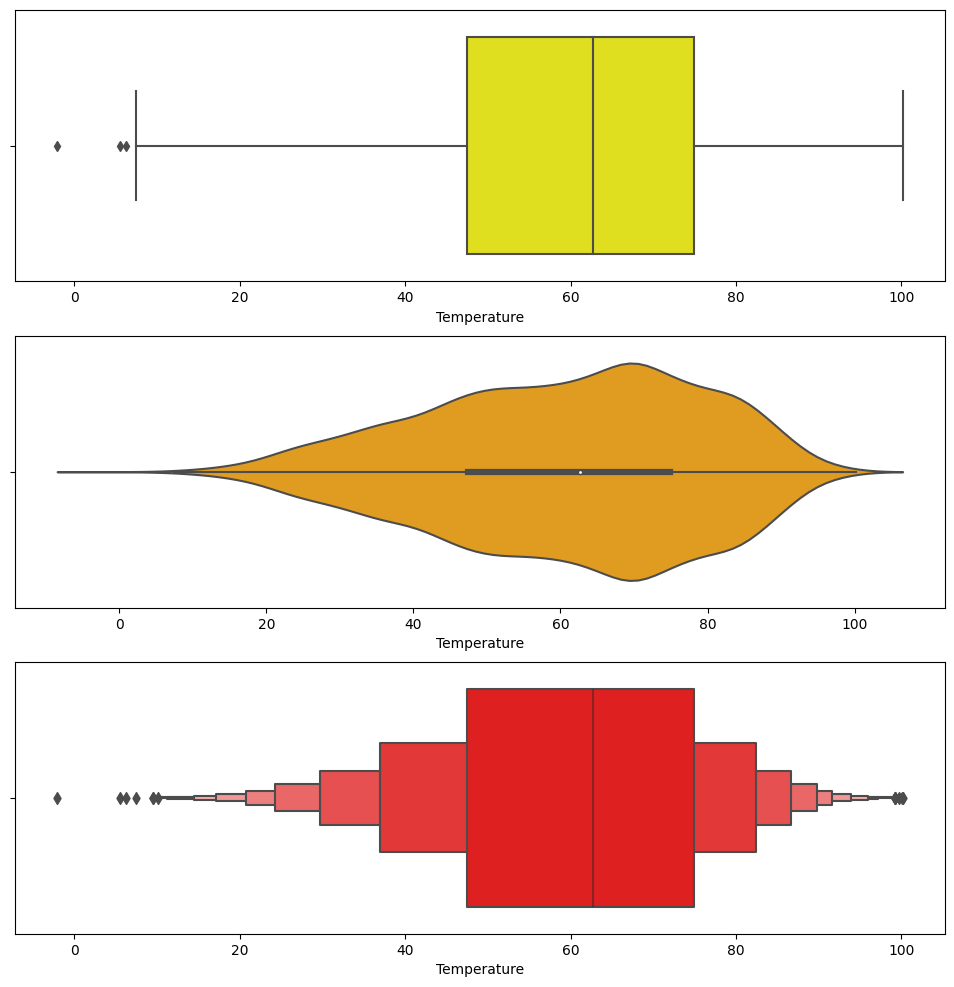

In [66]:
fig, axs = plt.subplots(nrows=3, figsize=(12, 12))
sns.boxplot(x = data2['Temperature'], ax=axs[0], color="yellow")
sns.violinplot(x = data2['Temperature'], ax=axs[1], color="orange")
sns.boxenplot(x = data2['Temperature'], ax=axs[2], color="red")
plt.show()

### FEATURE ENGINEERING

In [68]:
df_dummies = pd.get_dummies(data2,columns=['Store','Holiday_Flag'])
print(df_dummies.columns.to_list())

['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_1', 'Store_2', 'Store_3', 'Store_4', 'Store_5', 'Store_6', 'Store_7', 'Store_8', 'Store_9', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_30', 'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38', 'Store_39', 'Store_40', 'Store_41', 'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Holiday_Flag_0', 'Holiday_Flag_1']


In [80]:
df_dummies.sample()

Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
4075     536914.17        63.97       3.873  135.083733         9.966   

      Store_1  Store_2  Store_3  Store_4  Store_5  ...  Store_38  Store_39  \
4075        0        0        0        0        0  ...         0         0   

      Store_40  Store_41  Store_42  Store_43  Store_44  Store_45  \
4075         0         0         0         0         0         0   

      Holiday_Flag_0  Holiday_Flag_1  
4075               1               0  

[1 rows x 52 columns]

In [81]:
X = df_dummies.drop(['Weekly_Sales'],axis=1)
y = df_dummies.Weekly_Sales

### MODEL BUILDING

In [82]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

Splitting into Training and testing data.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

After few trial & errors,

In [112]:
model = RandomForestRegressor(n_estimators = 100,
                                min_samples_split = 2, 
                                min_samples_leaf= 1, 
                                max_features = 'sqrt', 
                                max_depth= 120, 
                                bootstrap=True) 

In [113]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=120, max_features='sqrt')

In [114]:
pred_on_train = model.predict(X_train)
pred_on_test = model.predict(X_test)

For Training Data 
 --------------------------------
MAE:  27020.397426592837
MSE:  2749166657.5915475
r2:  0.9913711448486051
RMSE:  52432.496198364875

For Test Data 
 --------------------------------
MAE:  71060.47563760688
MSE:  17527361333.300446
r2:  0.9447107433919005
RMSE:  132390.94128111805
Residual Analysis:


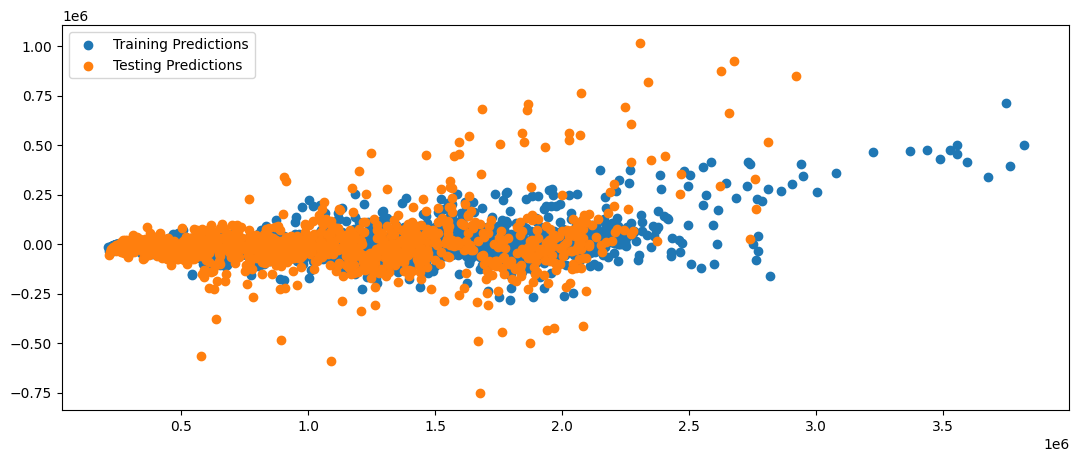

In [115]:
print("For Training Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_train, pred_on_train))
print("MSE: ",mean_squared_error(y_train, pred_on_train))
print("r2: ",r2_score(y_train, pred_on_train))
print("RMSE: ",np.sqrt(mean_squared_error(y_train, pred_on_train)))

print("")
print("For Test Data \n --------------------------------")
print("MAE: ",mean_absolute_error(y_test, pred_on_test))
print("MSE: ",mean_squared_error(y_test, pred_on_test))
print("r2: ",r2_score(y_test, pred_on_test))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,pred_on_test)))
    
print("Residual Analysis:")
plt.figure(figsize = (13,5))
plt.scatter(y_train,(y_train-pred_on_train),label = 'Training Predictions')
plt.scatter(y_test,(y_test-pred_on_test),label = 'Testing Predictions')
plt.legend(loc="upper left")